In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
from scipy import stats
from statsmodels.stats.weightstats import *
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# eyedrops = pd.read_excel('eye drops.xlsx', sheet_name='for_export')

eyedrops = pd.read_csv('eyedrops.gz')
eyedrops = eyedrops[['time', 'days_per_10', 'ml_in_30_days']]
eyedrops.dropna(inplace=True)
eyedrops.to_csv('eyedrops.gz')

eyedrops = eyedrops[eyedrops.days_per_10 < 100]
eyedrops = eyedrops[eyedrops.ml_in_30_days < 100]

eyedrops

,time,days_per_10,ml_in_30_days
0,2019-12-20 09:43:37,14.990046,20.013280
1,2020-01-07 23:51:36,18.588877,16.138683
2,2020-01-20 19:38:58,12.824560,23.392615
3,2020-01-30 12:27:48,9.700579,30.925990
4,2020-02-12 19:28:04,13.291852,22.570218
5,2020-02-22 11:57:41,9.687234,30.968593
6,2020-03-02 23:43:14,9.489965,31.612339
8,2020-03-29 11:52:01,24.481991,12.253905
9,2020-04-11 12:24:35,13.022616,23.036847
10,2020-04-25 10:01:34,13.900683,21.581674


days per 10 ml

<AxesSubplot:>

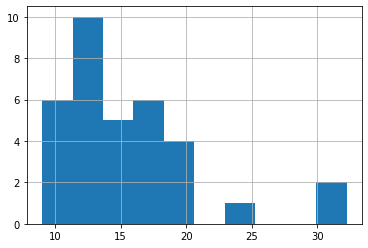

In [3]:
eyedrops.days_per_10.hist()


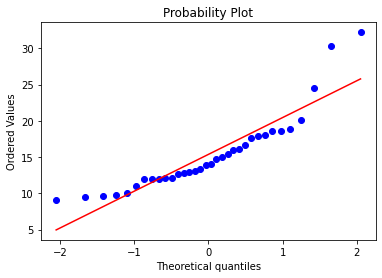

In [4]:
f = stats.probplot(eyedrops.days_per_10, dist="norm", plot = plt)

In [5]:
def do_normal_test(column, buckets=31):
    """
    проводим 3 теста на нормальность

    Args:
        column (pd.Series): входящие данные
        buckets (int): число бакетов для теста
    """    
    intervals = np.linspace(min(column), max(column),buckets)
    expected = []
    observed = []
    std = np.std(column)
    mu = np.mean(column)
    for i in range(1,len(intervals)):
        observed.append(len(column[(column < intervals[i]) & (column >= intervals[i-1])]))
        expected.append((norm.cdf(intervals[i], mu, std) - norm.cdf(intervals[i-1], mu, std))*len(column))

    print(chisquare(observed, expected, ddof = 2))

    k2, p = stats.normaltest(column)
    print("p = {:g} for stats.normaltest".format(p))
    alpha = 0.01
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

    print(stats.shapiro(column))



In [6]:
do_normal_test(eyedrops.days_per_10, 10)

Power_divergenceResult(statistic=20.505877171224565, pvalue=0.0022496939991987473)
p = 8.93651e-05 for stats.normaltest
The null hypothesis can be rejected
ShapiroResult(statistic=0.8468838334083557, pvalue=0.00023861309455242008)


## ml in 30 days

<AxesSubplot:>

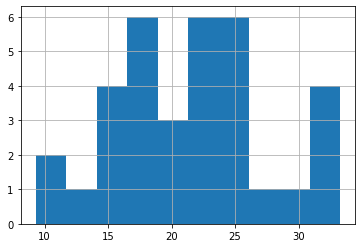

In [7]:
eyedrops.ml_in_30_days.hist()


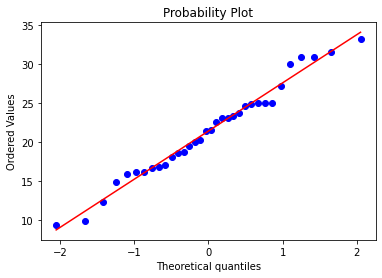

In [8]:
f = stats.probplot(eyedrops.ml_in_30_days, dist="norm", plot = plt)

In [9]:
do_normal_test(eyedrops.ml_in_30_days, 10)

Power_divergenceResult(statistic=11.992854974424187, pvalue=0.06212839109346921)
p = 0.935497 for stats.normaltest
The null hypothesis cannot be rejected
ShapiroResult(statistic=0.9772131443023682, pvalue=0.6830801963806152)


мл на 30 дней, если выкинуть выбросы - нельзя отвергать гипотезу о нормальном распределении